# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [2]:
df = pd.read_csv("lab12_files/US_Baby_Names_right.csv")

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [3]:
baby_names = df
print(baby_names.dtypes)
print(f'Ilość rekordów: {len(baby_names)}')

Unnamed: 0     int64
Id             int64
Name          object
Year           int64
Gender        object
State         object
Count          int64
dtype: object
Ilość rekordów: 1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [4]:
display(baby_names.head(10))

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [5]:
baby_names.drop('Unnamed: 0', axis=1, inplace=True)
baby_names.drop('Id', axis=1, inplace=True)
display(baby_names.head())

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [6]:
counts = baby_names['Gender'].value_counts()
print(counts)
if counts.keys()[0] == 'F':
    print('W zbiorze jest więcej imion kobiet')
else:
    print('W zbiorze jest więcej imion mężczyzn')

Gender
F    558846
M    457549
Name: count, dtype: int64
W zbiorze jest więcej imion kobiet


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [7]:
top_names = baby_names['Name'].value_counts().head(10)
display(pd.DataFrame(top_names))

,count
Name,
Riley,1112
Avery,1080
Jordan,1073
Peyton,1064
Hayden,1049
Taylor,1033
Jayden,1031
Alexis,984
Payton,971


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

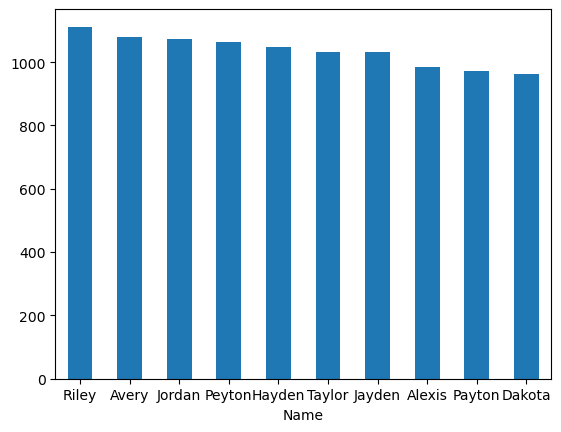

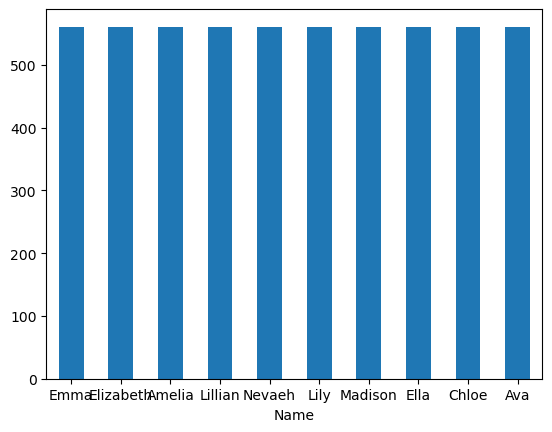

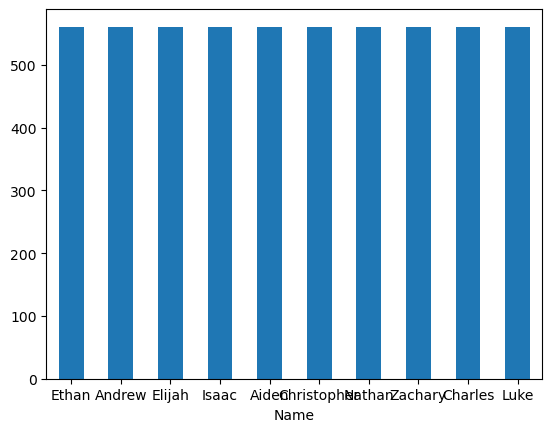

In [8]:
import matplotlib.pyplot as plt
top_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

top_female_names = df[df['Gender'] == 'F']['Name'].value_counts().head(10)
top_female_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

top_male_names = df[df['Gender'] == 'M']['Name'].value_counts().head(10)
top_male_names.plot.bar(x='Name', y='Count', rot=0)
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [9]:
print(df['Name'].nunique())

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [10]:
import numpy as np

def name_generator(names, names_prob):
    while True:
        generated_name = np.random.choice(names.index, p=names_prob)
        yield generated_name

names = baby_names['Name'].value_counts()
names_prob = names / names.sum()

for i, n in enumerate(name_generator(names, names_prob)):
    if i > 10:
        break
    print(n)

Catherine
Elizabeth
Drew
Abygail
Lucio
Jamilet
Yesenia
Devan
Raheem
Kania
Samantha


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [11]:
print(baby_names['Name'].value_counts().index[0])
display(baby_names['Name'].value_counts().agg([np.sum, np.mean, np.std]))

Riley


sum     1.016395e+06
mean    5.764491e+01
std     1.220300e+02
Name: count, dtype: float64

## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.